In [92]:
import sys
!{sys.executable} -m pip install xgboost

  Using cached xgboost-0.7.post3.tar.gz
    Complete output from command python setup.py egg_info:
    ++ pwd
    + oldpath=/private/var/folders/sf/yq1_tzr50_g5_jrr6q085lkc0000gn/T/pip-build-uhtm0pfb/xgboost
    + cd ./xgboost/
    + [[ darwin17 == \d\a\r\w\i\n* ]]
    + LIB_XGBOOST=libxgboost.dylib
    + make lib/libxgboost.dylib -j4
    Makefile:31: MAKE [/Applications/Xcode.app/Contents/Developer/usr/bin/make] - checked OK
    c++ -std=c++11 -Wall -Wno-unknown-pragmas -Iinclude   -I/private/var/folders/sf/yq1_tzr50_g5_jrr6q085lkc0000gn/T/pip-build-uhtm0pfb/xgboost/xgboost/dmlc-core/include -Irabit/include -I/include -O3 -funroll-loops -msse2 -fPIC -fopenmp -MM -MT build/logging.o src/logging.cc >build/logging.d
    c++ -std=c++11 -Wall -Wno-unknown-pragmas -Iinclude   -I/private/var/folders/sf/yq1_tzr50_g5_jrr6q085lkc0000gn/T/pip-build-uhtm0pfb/xgboost/xgboost/dmlc-core/include -Irabit/include -I/include -O3 -funroll-loops -msse2 -fPIC -fopenmp -MM -MT build/learner.o src/learner.cc

In [2]:
import matplotlib.pylab as plt
%matplotlib inline
import seaborn as sns
import numpy as np
from sklearn import preprocessing

In [3]:
import pandas as pd

In [4]:
from datetime import datetime
root_dir='/Users/rajathanda/Downloads/Principal_Project'
df=pd.read_csv(root_dir+'/Principal_Data/Principle_210_norm.csv',parse_dates=['PERIOD (FORMATTED)'],index_col='PERIOD (FORMATTED)',
                 infer_datetime_format=True, encoding='utf-8')

In [5]:
df.shape

(1267719, 209)

In [6]:
Target_variables = [x for x in df.columns.values if x not in ['FUTURE 1 WEEK RETURN',
 'FUTURE 4 WEEK RETURNS',
 'FUTURE 8 WEEK RETURNS',
 'FUTURE 12 WEEK RETURNS',
 'FUTURE 16 WEEK RETURNS',
 'FUTURE 20 WEEK RETURNS',
                                                             
 'FUTURE 28 WEEK RETURNS',
 'FUTURE 32 WEEK RETURNS',
 'FUTURE 36 WEEK RETURNS',
 'FUTURE 40 WEEK RETURNS',
 'FUTURE 44 WEEK RETURNS',
 'FUTURE 48 WEEK RETURNS']]

In [7]:
df_f=df[Target_variables]

In [8]:
df_f.shape

(1267719, 197)

In [32]:
df_f['Excess']=df_f['FUTURE 24 WEEK RETURNS']-df_f['FUTURE 24 WEEK RETURNS'].mean()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
del df_f["Unnamed: 0"]

In [13]:
df_f.head()

,IDENTIFIER,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,3M_RET,6M_RET,...,NAME,TICKER,FUTURE 24 WEEK RETURNS,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Week/Year,Year,Excess
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-08-07,B66Y3W,-0.325458,1,1,0,1,0.000710,-0.001156,-0.043138,-0.006502,...,Grupo Aval Acciones y Valores Grupo Pfd,PFAVAL-CO,-21.837562,Banks,COLOMBIA,LATIN AMERICA,Financials,8/2015,2015,-25.786733
2015-08-14,46625H10,-0.325458,1,1,1,1,-0.457558,-0.000262,0.002815,0.002789,...,JPMorgan Chase & Co.,JPM,-11.073070,Banks,UNITED STATES,UNITED STATES,Financials,8/2015,2015,-15.022242
2015-08-14,22531010,-0.325458,1,0,1,0,-0.437356,-0.001977,-0.027845,0.004000,...,Credit Acceptance Corporation,CACC,-13.421253,Diversified Financials,UNITED STATES,UNITED STATES,Financials,8/2015,2015,-17.370424
2015-08-14,68193610,-0.325458,1,0,1,0,0.037392,0.000447,0.002488,-0.003288,...,"Omega Healthcare Investors, Inc.",OHI,-9.963345,Real Estate,UNITED STATES,UNITED STATES,Real Estate,8/2015,2015,-13.912517
2015-08-14,05348410,-0.325458,1,1,1,1,-0.417154,0.000501,0.009452,0.000103,...,"AvalonBay Communities, Inc.",AVB,-1.768926,Real Estate,UNITED STATES,UNITED STATES,Real Estate,8/2015,2015,-5.718098


In [36]:
df_f.index=df_f['PERIOD (FORMATTED)']

DatetimeIndex(['2015-08-07', '2015-08-14', '2015-08-14', '2015-08-14',
               '2015-08-14', '2015-08-14', '2015-08-14', '2015-08-14',
               '2015-08-14', '2015-08-14',
               ...
               '2013-04-26', '2013-04-26', '2013-04-26', '2013-05-03',
               '2013-05-03', '2013-05-03', '2013-05-03', '2013-05-03',
               '2013-05-10', '2013-05-10'],
              dtype='datetime64[ns]', name='PERIOD (FORMATTED)', length=1267719, freq=None)

In [39]:
df_ts=df_f['Excess']

In [40]:
df_ts.head()

PERIOD (FORMATTED)
2015-08-07   -25.786733
2015-08-14   -15.022242
2015-08-14   -17.370424
2015-08-14   -13.912517
2015-08-14    -5.718098
Name: Excess, dtype: float64

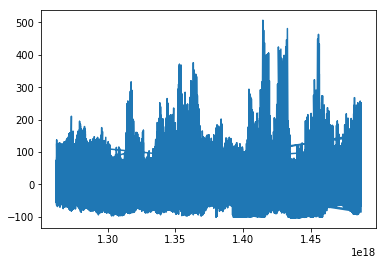

In [53]:
plt.plot(df_ts)

In [ ]:
corrmat = df_f.corr(method='spearman')

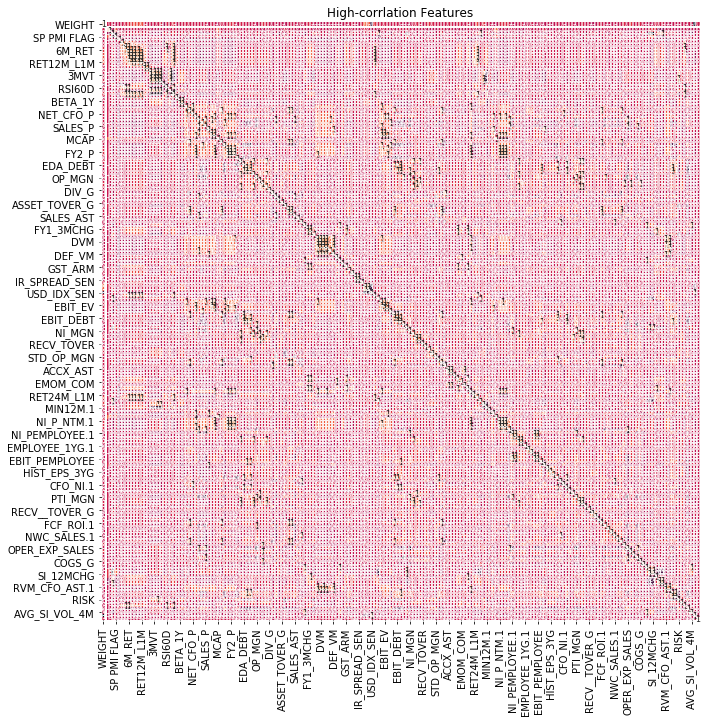

In [57]:
f, ax = plt.subplots(figsize=(11, 11))
sns.heatmap(corrmat, cbar=False, annot=True, square=True, fmt='.0f', 
            annot_kws={'size': 8})
plt.title('High-corrlation Features')
plt.show()

In [58]:
iters = range(len(corrmat.columns) - 1)
drop_cols = []

In [61]:
# Iterates through Correlation Matrix Table to find correlated columns
for i in iters:
    for j in range(i):
        item = corrmat.iloc[j:(j+1), (i+1):(i+2)]
        col = item.columns
        row = item.index
        val = item.values
        if val >= 0.75:
            print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
            drop_cols.append(i)

    

RET9M_L1M | 9M_RET | 0.85
RET12M_L1M | 12M_RET | 0.89
6MVT | 1MVT | 0.76
12MVT | 3MVT | 0.82
RSI60D | 3M_RET | 0.9
LOTTERY1M | 1MVT | 0.83
1YHIGH_OFF | 9M_RET | 0.76
SALES_P | SALES_EV | 0.89
FCF_EV | FCF_P | 0.95
AST_P | BK_P | 0.8
EPS_P_NTM | FY1_P | 0.93
NI_G | HIST_EPS_1YG | 0.84
NI_G | ROE_1YG | 0.88
FCF_SALES | FCF_P | 0.85
FCF_SALES | FCF_EV | 0.83
SALES_AST | ASSET_TOVER | 0.96
HVM | RVM_CFO_P | 0.77
DEF_VM | HVM | 0.78
RET6M_L1M | 6M_RET | 0.78
RET6M_L1M | 9M_RET | 0.77
RET6M_L1M | RET9M_L1M | 0.76
EDA_MCAP | EDA_EV | 0.77
EDA_MCAP | EBIT_MCAP | 0.85
EBIT_EV | EDA_EV | 0.85
EBIT_EV | EBIT_MCAP | 0.78
RD_NI_P | EP_LTM | 0.87
TBK_P | BK_P | 0.8
FCF_DEBT | FCF_EV | 0.78
EBIT_DEBT | EDA_DEBT | 0.95
ROI | ROE | 0.8
ROI | ROA | 0.85
NI_MGN | OP_MGN | 0.8
NI_MGN_G | HIST_EPS_1YG | 0.77
NI_MGN_G | ROE_1YG | 0.84
NI_MGN_G | NI_G | 0.9
OPER_INC_G | OP_MGN_G | 0.79
FCF_BK | FCF_P | 0.77
FCF_BK | FCF_EV | 0.77
FCF_BK | FCF_CAPEX | 0.79
CAPEX_AST | CAPEX_SALES | 0.79
EMOM_3MCHG | FY1_3MCHG

In [63]:
drops = sorted(set(drop_cols))[::-1]

    # Drops the correlated columns
for i in drops:
    col = df_f.iloc[:, (i+1):(i+2)].columns.values
    df_f1 = df_f.drop(col, axis=1)

In [69]:
col

array(['9M_RET'], dtype=object)

In [72]:
high_corr_var=np.where(corrmat>0.75)
high_corr_var=[(corrmat.columns[x],corrmat.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]

In [73]:
high_corr_var

[('3M_RET', 'RSI60D'),
 ('3M_RET', 'TECHNICAL1.1'),
 ('6M_RET', '9M_RET'),
 ('6M_RET', 'RET6M_L1M'),
 ('9M_RET', '12M_RET'),
 ('9M_RET', 'RET9M_L1M'),
 ('9M_RET', '1YHIGH_OFF'),
 ('9M_RET', 'RET6M_L1M'),
 ('9M_RET', 'RSI_12M.1'),
 ('12M_RET', 'RET9M_L1M'),
 ('12M_RET', 'RET12M_L1M'),
 ('12M_RET', 'RSI_12M.1'),
 ('RET9M_L1M', 'RET12M_L1M'),
 ('RET9M_L1M', 'RET6M_L1M'),
 ('RET9M_L1M', 'RSI_12M.1'),
 ('RET12M_L1M', 'RSI_12M.1'),
 ('1MVT', '3MVT'),
 ('1MVT', '6MVT'),
 ('1MVT', 'LOTTERY1M'),
 ('3MVT', '6MVT'),
 ('3MVT', '12MVT'),
 ('6MVT', '12MVT'),
 ('RSI60D', 'TECHNICAL1.1'),
 ('1YHIGH_OFF', 'RSI_12M.1'),
 ('BETA_1Y', 'BETA_3Y'),
 ('FCF_P', 'FCF_EV'),
 ('FCF_P', 'FCF_SALES'),
 ('FCF_P', 'FCF_BK'),
 ('EP_LTM', 'RD_NI_P'),
 ('SALES_EV', 'SALES_P'),
 ('SALES_EV', 'SALES_P_FY2'),
 ('BK_P', 'AST_P'),
 ('BK_P', 'TBK_P'),
 ('SALES_P', 'SALES_P_FY2'),
 ('DIV_YID', 'PE_DIVYLD.1'),
 ('EDA_EV', 'EDA_MCAP'),
 ('EDA_EV', 'EBIT_EV'),
 ('EBIT_MCAP', 'EDA_MCAP'),
 ('EBIT_MCAP', 'EBIT_EV'),
 ('MCAP', 'EV.

In [75]:
 for i in range(len(corrmat.columns)):
        for j in range(i):
            if corrmat.iloc[i, j] >= 75:
                colname = corrmat.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in df_f.columns:
                    del df_f[colname] # deleting the column from the dataset



In [11]:
df_f.shape

(1267719, 197)

In [78]:
corrmat.head()

,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,3M_RET,6M_RET,9M_RET,...,VALUE_COM.1,PROFITABILITY.1,QUALITY.1,RISK,GROWTH.1,TECHNICAL1.1,PP_RANK,AVG_SI_VOL_4M,Year,Excess
WEIGHT,1.000000,NaN,0.047604,0.013536,-0.053674,0.002662,0.041126,0.087560,0.163441,0.210888,...,-0.022978,-0.022901,0.011399,-0.013703,-0.008872,0.013584,-0.007530,0.015908,-0.895849,0.044603
MARKET CAPITALIZATION,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSCI ACWI FLAG,0.047604,NaN,1.000000,-0.158264,0.291690,-0.007494,-0.000052,0.001862,0.008803,0.011610,...,-0.005117,-0.004617,-0.001320,-0.043380,-0.039153,0.021113,-0.016610,-0.031586,-0.046870,0.001212
R1000 FLAG,0.013536,NaN,-0.158264,1.000000,-0.399323,-0.009998,0.040759,0.078144,0.099191,0.115153,...,0.030789,0.136031,0.069514,-0.174178,-0.014482,0.019378,-0.061716,-0.359232,-0.011727,0.083891
SP PMI FLAG,-0.053674,NaN,0.291690,-0.399323,1.000000,-0.025199,-0.017446,-0.033846,-0.046896,-0.057033,...,-0.001783,-0.005362,-0.025538,-0.025756,-0.002871,-0.013633,-0.042982,0.037663,0.050947,-0.026889


In [14]:
df_f.drop(['RET9M_L1M', 'RET12M_L1M','1MVT','3MVT','RSI60D','LOTTERY1M','1YHIGH_OFF',
          'SALES_P','FCF_EV','AST_P','EPS_P_NTM','HIST_EPS_1YG','ROE_1YG','FCF_P','FCF_EV',
          'SALES_AST','RVM_CFO_P','DEF_VM','RET6M_L1M','RD_NI_P','EBIT_EV','BK_P','FCF_EV','EBIT_DEBT',
          'OP_MGN','HIST_EPS_1YG','ROE_1YG','NI_G','OP_MGN_G','FCF_P','FCF_EV','FCF_CAPEX','CAPEX_SALES',
          'FY1_3MCHG','FY2_3MCHG','FY2_3MCHG','GST_ARM','EMOM_3MCHG','9M_RET','12M_RET','RET9M_L1M','RET12M_L1M',
          'TOVER9M.1','1YHIGH_OFF','DIV_YID','FY1_P','FY2_P','EPS_P_NTM','FY2_P','EPS_P_NTM','NI_P_NTM.1','SALES_EV',
          'SALES_P','NI_PEMPLOYEE.1','SALES_PEMPLOYEE.1','NI_PEMPLOYEE.1','EDA_DEBT','EBIT_DEBT','OP_MGN','NI_MGN',
          'HIST_EPS_1YG','NI_MGN_G','NI_G','NWC_SALES.1','RVM_CFO_P','DVM','HVM','FVM','DEF_VM','ROA','3M_RET',
          'RSI60D','SI_2MVOL.1'], axis=1, inplace=True)

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [15]:
df_f.shape

(1267719, 145)

In [81]:
train_y = df_f.Excess.values

In [83]:
Numeric_variables = [x for x in df_f.columns.values if x not in ['FUTURE 1 WEEK RETURN',
 'FUTURE 4 WEEK RETURNS',
 'FUTURE 8 WEEK RETURNS',
 'FUTURE 12 WEEK RETURNS',
 'FUTURE 16 WEEK RETURNS',
 'FUTURE 20 WEEK RETURNS',
 'FUTURE 24 WEEK RETURNS',
 'FUTURE 28 WEEK RETURNS',
 'FUTURE 32 WEEK RETURNS',
 'FUTURE 36 WEEK RETURNS',
 'FUTURE 40 WEEK RETURNS',
 'FUTURE 44 WEEK RETURNS',
 'FUTURE 48 WEEK RETURNS','TICKER','Week/Year','Year','PERIOD (FORMATTED)', 'IDENTIFIER' , 'MARKET CAPITALIZATION','MSCI ACWI FLAG','R1000 FLAG','SP PMI FLAG',            
                                                              'FG_COUNTRY','REGION_XL','SECTOR',
                                                              'PERF_INDGRP','NAME']]


In [20]:
obj_df = df_f.select_dtypes(include=['object']).copy()
obj_df.head()

,IDENTIFIER,Week/Year
PERIOD (FORMATTED),,
2015-08-07,B66Y3W,8/2015
2015-08-14,46625H10,8/2015
2015-08-14,22531010,8/2015
2015-08-14,68193610,8/2015
2015-08-14,05348410,8/2015


In [43]:
obj_df.drop('PERIOD (FORMATTED)')

,IDENTIFIER,NAME,TICKER,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Week/Year
PERIOD (FORMATTED),,,,,,,,
2015-08-07,B66Y3W,Grupo Aval Acciones y Valores Grupo Pfd,PFAVAL-CO,Banks,COLOMBIA,LATIN AMERICA,Financials,8/2015
2015-08-14,46625H10,JPMorgan Chase & Co.,JPM,Banks,UNITED STATES,UNITED STATES,Financials,8/2015
2015-08-14,22531010,Credit Acceptance Corporation,CACC,Diversified Financials,UNITED STATES,UNITED STATES,Financials,8/2015
2015-08-14,68193610,"Omega Healthcare Investors, Inc.",OHI,Real Estate,UNITED STATES,UNITED STATES,Real Estate,8/2015
2015-08-14,05348410,"AvalonBay Communities, Inc.",AVB,Real Estate,UNITED STATES,UNITED STATES,Real Estate,8/2015
2015-08-14,89102710,Torchmark Corporation,TMK,Insurance,UNITED STATES,UNITED STATES,Financials,8/2015
2015-08-14,G0538410,Aspen Insurance Holdings Limited,AHL,Insurance,UNITED STATES,UNITED STATES,Financials,8/2015
2015-08-14,BHWQZW,"Gentera, S.A.B. de C.V.",GENTERA-MX,Diversified Financials,MEXICO,LATIN AMERICA,Financials,8/2015
2015-08-14,013670,British Land Company PLC,BLND-GB,Real Estate,UNITED KINGDOM,UNITED KINGDOM,Real Estate,8/2015


In [19]:
obj_df[obj_df.isnull().any(axis=1)]

NameError: name 'obj_df' is not defined

In [16]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df_f["NAME"] = lb_make.fit_transform(df_f["NAME"])
df_f["TICKER"] = lb_make.fit_transform(df_f["TICKER"])
df_f["PERF_INDGRP"] = lb_make.fit_transform(df_f["PERF_INDGRP"])
df_f["REGION_XL"] = lb_make.fit_transform(df_f["REGION_XL"])
df_f["FG_COUNTRY"] = lb_make.fit_transform(df_f["FG_COUNTRY"])

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-d

In [18]:
df_f["SECTOR"] = lb_make.fit_transform(df_f["SECTOR"])
df_f.head()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,IDENTIFIER,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,6M_RET,1M_6MUSDVOL_CHG,...,NAME,TICKER,FUTURE 24 WEEK RETURNS,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Week/Year,Year,Excess
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-08-07,B66Y3W,-0.325458,1,1,0,1,0.000710,-0.001156,-0.006502,-0.000004,...,1909,3869,-21.837562,1,7,8,3,8/2015,2015,-25.786733
2015-08-14,46625H10,-0.325458,1,1,1,1,-0.457558,-0.000262,0.002789,-0.000004,...,2372,3231,-11.073070,1,49,11,3,8/2015,2015,-15.022242
2015-08-14,22531010,-0.325458,1,0,1,0,-0.437356,-0.001977,0.004000,-0.000002,...,1183,2142,-13.421253,6,49,11,3,8/2015,2015,-17.370424
2015-08-14,68193610,-0.325458,1,0,1,0,0.037392,0.000447,-0.003288,-0.000004,...,3284,3765,-9.963345,16,49,11,8,8/2015,2015,-13.912517
2015-08-14,05348410,-0.325458,1,1,1,1,-0.417154,0.000501,0.000103,-0.000004,...,393,1876,-1.768926,16,49,11,8,8/2015,2015,-5.718098


In [29]:


del df_f['X1']

In [30]:
df_f.head()

,IDENTIFIER,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,6M_RET,1M_6MUSDVOL_CHG,...,PP_RANK,AVG_SI_VOL_4M,NAME,TICKER,FUTURE 24 WEEK RETURNS,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Excess
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-08-07,B66Y3W,-0.325458,1,1,0,1,0.000710,-0.001156,-0.006502,-0.000004,...,-0.244777,-0.000023,1909,3869,-21.837562,1,7,8,3,-25.786733
2015-08-14,46625H10,-0.325458,1,1,1,1,-0.457558,-0.000262,0.002789,-0.000004,...,0.068354,-0.005522,2372,3231,-11.073070,1,49,11,3,-15.022242
2015-08-14,22531010,-0.325458,1,0,1,0,-0.437356,-0.001977,0.004000,-0.000002,...,-0.436697,0.002295,1183,2142,-13.421253,6,49,11,3,-17.370424
2015-08-14,68193610,-0.325458,1,0,1,0,0.037392,0.000447,-0.003288,-0.000004,...,-0.315484,-0.003720,3284,3765,-9.963345,16,49,11,8,-13.912517
2015-08-14,05348410,-0.325458,1,1,1,1,-0.417154,0.000501,0.000103,-0.000004,...,-0.396293,-0.000499,393,1876,-1.768926,16,49,11,8,-5.718098


In [1]:
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W.construct_W(df_f[Obj_var], **kwargs_W)

NameError: name 'construct_W' is not defined

In [8]:
Obj_var = [x for x in df_f.columns.values if x not in ['PERIOD (FORMATTED)',
 'IDENTIFIER',
 ]]

In [ ]:
Numeric_variables = [x for x in df_f.columns.values if x not in []]


In [9]:
df_f[Obj_var].head()

,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,6M_RET,1M_6MUSDVOL_CHG,1M_6MVOL_CHG,...,PP_RANK,AVG_SI_VOL_4M,NAME,TICKER,FUTURE 24 WEEK RETURNS,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Excess
0,-0.325458,1,1,0,1,0.000710,-0.001156,-0.006502,-0.000004,-0.067316,...,-0.244777,-0.000023,1909,3869,-21.837562,1,7,8,3,-25.786733
1,-0.325458,1,1,1,1,-0.457558,-0.000262,0.002789,-0.000004,-0.013168,...,0.068354,-0.005522,2372,3231,-11.073070,1,49,11,3,-15.022242
2,-0.325458,1,0,1,0,-0.437356,-0.001977,0.004000,-0.000002,0.098049,...,-0.436697,0.002295,1183,2142,-13.421253,6,49,11,3,-17.370424
3,-0.325458,1,0,1,0,0.037392,0.000447,-0.003288,-0.000004,-0.035430,...,-0.315484,-0.003720,3284,3765,-9.963345,16,49,11,8,-13.912517
4,-0.325458,1,1,1,1,-0.417154,0.000501,0.000103,-0.000004,-0.028119,...,-0.396293,-0.000499,393,1876,-1.768926,16,49,11,8,-5.718098


In [6]:
root_dir='/Users/rajathanda/Downloads/Principal_Project'
df_f=pd.read_csv(root_dir+'/Principal_Data/PR_Data_ONEHOT.csv',
                 infer_datetime_format=True, encoding='utf-8')

In [21]:
df_f.to_csv(root_dir+'/Principal_Data/PR_Data_ONEHOT.csv', encoding='utf-8', index=False)

In [19]:
N = [x for x in df_f.columns.values if x in ['PERF_INDGRP','FG_COUNTRY','REGION_XL','SECTOR','NAME']]

In [ ]:
df_f[N] = df_f[N].apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))

In [47]:
df_f.head()

,IDENTIFIER,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,6M_RET,1M_6MUSDVOL_CHG,...,PP_RANK,AVG_SI_VOL_4M,NAME,TICKER,FUTURE 24 WEEK RETURNS,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Excess
0,B66Y3W,-0.325458,1,1,0,1,0.000710,-0.001156,-0.006502,-0.000004,...,-0.244777,-0.000023,1909,3869,-21.837562,1,7,8,3,-25.786733
1,46625H10,-0.325458,1,1,1,1,-0.457558,-0.000262,0.002789,-0.000004,...,0.068354,-0.005522,2372,3231,-11.073070,1,49,11,3,-15.022242
2,22531010,-0.325458,1,0,1,0,-0.437356,-0.001977,0.004000,-0.000002,...,-0.436697,0.002295,1183,2142,-13.421253,6,49,11,3,-17.370424
3,68193610,-0.325458,1,0,1,0,0.037392,0.000447,-0.003288,-0.000004,...,-0.315484,-0.003720,3284,3765,-9.963345,16,49,11,8,-13.912517
4,05348410,-0.325458,1,1,1,1,-0.417154,0.000501,0.000103,-0.000004,...,-0.396293,-0.000499,393,1876,-1.768926,16,49,11,8,-5.718098


In [ ]:
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X_train, y_train)     

In [15]:
y_train=df_f.iloc[:,-1]

In [61]:
del df_f['IDENTIFIER']

In [62]:
X_train=df_f.loc[:, df_f.columns != 'Excess']

In [22]:
X_train=df_f.loc[:, df_f.columns != 'IDENTIFIER']

In [64]:
y_train

0         -25.786733
1         -15.022242
2         -17.370424
3         -13.912517
4          -5.718098
5         -16.585792
6          -9.341358
7           4.185094
8         -25.282010
9         -17.893852
10        -22.227953
11        -16.773823
12        -28.842164
13        -30.813572
14        -34.042847
15        -33.809332
16         -7.351227
17        -32.644531
18        -13.807758
19        -11.175336
20        -13.352508
21        -24.564380
22         15.854322
23        -11.608815
24        -23.282626
25         38.625542
26        -20.291824
27        -11.829048
28        -18.601698
29         -1.205988
             ...    
1267689    -6.095939
1267690     2.618382
1267691    11.910636
1267692    -2.805229
1267693   -18.028163
1267694     0.186551
1267695    -1.039095
1267696   -24.364236
1267697   -17.939120
1267698    18.614738
1267699    18.598878
1267700   -24.385191
1267701   -20.955404
1267702    -6.828240
1267703   -29.326884
1267704     7.454182
1267705   -20

In [1]:
from sklearn.random_projection import GaussianRandomProjection

In [10]:
n_comp = 12
grp = GaussianRandomProjection(n_components=n_comp, eps=0.1, random_state=420)
grp_results_train = grp.fit_transform(df_f[Obj_var])

In [12]:
train_grp = pd.DataFrame()

In [13]:
for i in range(1, n_comp + 1):
    train_grp['grp_' + str(i)] = grp_results_train[:, i - 1]

In [60]:
X_train

,WEIGHT,MARKET CAPITALIZATION,MSCI ACWI FLAG,R1000 FLAG,SP PMI FLAG,RANK,1M_RET,6M_RET,1M_6MUSDVOL_CHG,1M_6MVOL_CHG,...,PP_RANK,AVG_SI_VOL_4M,NAME,TICKER,FUTURE 24 WEEK RETURNS,PERF_INDGRP,FG_COUNTRY,REGION_XL,SECTOR,Excess
0,-0.325458,1,1,0,1,0.000710,-0.001156,-0.006502,-0.000004,-0.067316,...,-0.244777,-0.000023,1909,3869,-21.837562,1,7,8,3,-25.786733
1,-0.325458,1,1,1,1,-0.457558,-0.000262,0.002789,-0.000004,-0.013168,...,0.068354,-0.005522,2372,3231,-11.073070,1,49,11,3,-15.022242
2,-0.325458,1,0,1,0,-0.437356,-0.001977,0.004000,-0.000002,0.098049,...,-0.436697,0.002295,1183,2142,-13.421253,6,49,11,3,-17.370424
3,-0.325458,1,0,1,0,0.037392,0.000447,-0.003288,-0.000004,-0.035430,...,-0.315484,-0.003720,3284,3765,-9.963345,16,49,11,8,-13.912517
4,-0.325458,1,1,1,1,-0.417154,0.000501,0.000103,-0.000004,-0.028119,...,-0.396293,-0.000499,393,1876,-1.768926,16,49,11,8,-5.718098
5,-0.325458,1,1,1,1,0.370725,0.000484,0.003043,-0.000004,0.002040,...,-0.335687,0.005740,4533,4579,-12.636620,12,49,11,3,-16.585792
6,-0.325458,1,0,1,0,-0.366649,0.000009,0.000776,-0.000004,0.025439,...,0.229970,-0.007741,349,1685,-5.392187,12,49,11,3,-9.341358
7,-0.325458,1,1,0,0,0.239412,-0.000891,-0.004924,-0.000004,-0.047993,...,-0.497303,-0.000023,1808,2865,8.134266,6,27,8,3,4.185094
8,-0.325458,1,1,0,1,-0.023214,0.000373,0.000839,-0.000004,-0.003177,...,-0.295282,-0.000023,650,2027,-21.332839,16,48,10,8,-25.282010
9,-0.325458,1,1,0,1,-0.407053,-0.000081,0.000419,-0.000004,-0.042155,...,0.199667,-0.000023,2338,3149,-13.944681,6,42,4,3,-17.893852


In [65]:
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
Selector_f = SelectPercentile(f_regression, percentile=25)
Selector_f.fit(X_train,y_train)

/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:298: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:303: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


SelectPercentile(percentile=25,
         score_func=<function f_regression at 0x22cae7bf8>)

In [66]:

for n,s in zip(X_train.columns,Selector_f.scores_):
    d[s]=n
    print ("F-score: %3.2ft for feature %s " % (s,n))

F-score: 4906.55t for feature WEIGHT 
F-score: nant for feature MARKET CAPITALIZATION 
F-score: 198.97t for feature MSCI ACWI FLAG 
F-score: 4826.29t for feature R1000 FLAG 
F-score: 438.83t for feature SP PMI FLAG 
F-score: 4013.33t for feature RANK 
F-score: 288.79t for feature 1M_RET 
F-score: 85.26t for feature 6M_RET 
F-score: 1.18t for feature 1M_6MUSDVOL_CHG 
F-score: 327.84t for feature 1M_6MVOL_CHG 
F-score: 67.62t for feature 6MVT 
F-score: 48.27t for feature 12MVT 
F-score: 0.02t for feature P_ACTION 
F-score: 198.25t for feature COMPMOM_SCORE 
F-score: 0.13t for feature BETA_1Y 
F-score: 0.03t for feature BETA_3Y 
F-score: 2.88t for feature CFO_P 
F-score: 3.20t for feature NET_CFO_P 
F-score: 3.57t for feature EP_LTM 
F-score: 3.20t for feature EDA_EV 
F-score: 3.21t for feature EBIT_MCAP 
F-score: 97.19t for feature MCAP 
F-score: 1.14t for feature D_E 
F-score: 4.66t for feature ROE 
F-score: 0.32t for feature SALES_G 
F-score: 4.83t for feature DIV_G 
F-score: 438.89t f

In [67]:
sorted(d.items())

[(-2.378870753671364e+20, 'Excess'),
 (0.00016370261827879272, 'INVEN_CHG'),
 (4906.549483723672, 'WEIGHT'),
 (nan, 'MARKET CAPITALIZATION'),
 (-5.8258059273585377e+19, 'FUTURE 24 WEEK RETURNS'),
 (0.000248067255222523, 'REINV_RATE.1'),
 (0.0005931906093736421, 'FY2_6MCHG.1'),
 (0.010509299897004184, 'OPER_INC_G'),
 (0.016507503160710049, 'P_ACTION'),
 (0.027171097518092664, 'BETA_3Y'),
 (0.035505439579378607, 'CV_ADJ_6MCHG.1'),
 (0.040140245542198506, 'CAPEX_DEP'),
 (0.055343203976799843, 'CV_ADJ_3MCHG.1'),
 (0.11007619132982803, 'TAX_SALES'),
 (0.13243168802414079, 'BETA_1Y'),
 (0.15224157536665309, 'OUTSHSCHG.1'),
 (0.20794899869708014, 'PE_DIVYLD.1'),
 (0.31615744072207103, 'SALES_G'),
 (0.36529004254673381, 'PERF_INDGRP'),
 (0.44945308822469604, 'STD_EPS'),
 (0.49465258462853773, 'OCF_SALES.1'),
 (0.5652181189013662, 'DEBT_G.1'),
 (0.7783228641151515, 'SI_12MCHG'),
 (0.79986592053779138, 'EBIT_PEMPLOYEE'),
 (0.93456995247787611, 'WC_ACCX'),
 (0.98393679798612665, 'CURR_RATIO'),
 (

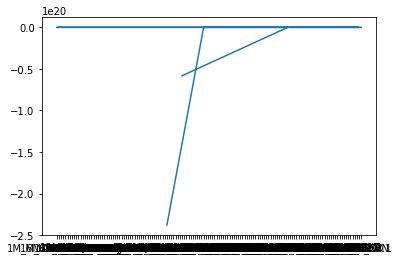

In [44]:
import matplotlib.pylab as plt

lists = sorted(d.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(y, x)
plt.show()

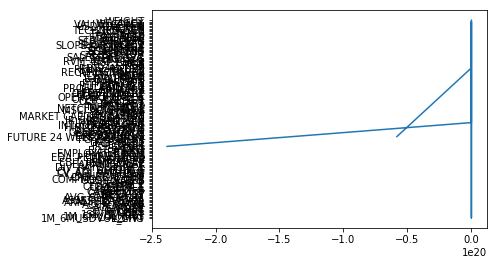

In [45]:
plt.plot(*zip(*sorted(d.items())))
plt.show()

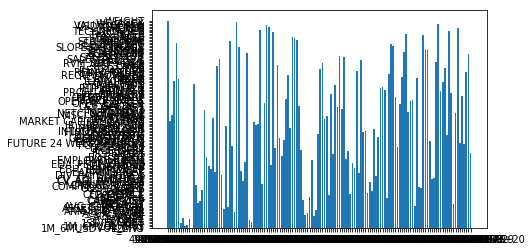

In [50]:
plt.bar(range(len(d)), list(d.values()), align='center')
plt.xticks(range(len(d)), list(d.keys()))
plt.figure(figsize=(400,400))

plt.show()

In [54]:
s = sorted(d.keys())

# Display the sorted keys.
for key in s:
    print(key, d[key])

-2.37887075367e+20 Excess
0.000163702618279 INVEN_CHG
4906.54948372 WEIGHT
nan MARKET CAPITALIZATION
-5.82580592736e+19 FUTURE 24 WEEK RETURNS
0.000248067255223 REINV_RATE.1
0.000593190609374 FY2_6MCHG.1
0.010509299897 OPER_INC_G
0.0165075031607 P_ACTION
0.0271710975181 BETA_3Y
0.0355054395794 CV_ADJ_6MCHG.1
0.0401402455422 CAPEX_DEP
0.0553432039768 CV_ADJ_3MCHG.1
0.11007619133 TAX_SALES
0.132431688024 BETA_1Y
0.152241575367 OUTSHSCHG.1
0.207948998697 PE_DIVYLD.1
0.316157440722 SALES_G
0.365290042547 PERF_INDGRP
0.449453088225 STD_EPS
0.494652584629 OCF_SALES.1
0.565218118901 DEBT_G.1
0.778322864115 SI_12MCHG
0.799865920538 EBIT_PEMPLOYEE
0.934569952478 WC_ACCX
0.983936797986 CURR_RATIO
1.03497763033 CRB_COM_SEN
1.1133429189 SI_6MCHG.1
1.1434733497 D_E
1.17885391089 1M_6MUSDVOL_CHG
1.40693950546 EARNING_RISK
1.61695549415 FCF_SALES
1.82647149371 IR_SEN_10Y
2.58236072177 CFO_NI.1
2.88432731342 CFO_P
3.11543035449 OIL_SEN
3.13317815549 TOVER6M
3.14106426391 SALES_P_FY2
3.19175689504 PTI_

In [73]:
from sklearn.feature_selection import RFECV
from sklearn.svm import SVR

In [ ]:
estimator = SVR(kernel="linear")
selector = RFECV(estimator, cv=10,scoring="mean_squared_error")
selector.fit(X_train, y_train)

/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/m

/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/usr/local/lib/python3.6/site-packages/sklearn/m

/usr/local/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


In [68]:
print(“Optimal number of features: %d”
 % selector.n_features_)

SyntaxError: invalid character in identifier (<ipython-input-68-467229379ef5>, line 3)

In [37]:

threefive_variables = [x for x in df_f.columns.values if x in ['IDENTIFIER','MCAP','HIST_EPS_3YG','ACCX_AST','RD_SALES','HIST_EPS_5YG.1','STD_OP_MGN','TED_SEN','SLOPE_OP_MGN.1','EV.1',
'COMPMOM_SCORE','MSCI','ACCX','TICKER','1M_RET','AVG_SI_VOL_4M','CASH_P.1','1M_6MVOL_CHG','SECTOR','SP','ASSET_TOVER',
'IST_SURPY1','TECHNICAL1.1','SENTIMENT','SI_OUTSHS','EQT_ASSET','RSI_12M.1','MIN12M.1','OCF_AST','CVM','CAPEX_AST',
'EMOM','QUALITY.1','PP_RANK','EMOM_COM','RISK','STD_SALES','VALUE_COM.1','REGION_XL','1SS_ERNQLT','RVM_CFO_AST.1','FG_COUNTRY',
'ARM_PFD_COMP','RANK','R1000','RET24M_L1M','Excess']]


In [38]:
df_three=df_f[threefive_variables]

In [39]:
df_three

,IDENTIFIER,RANK,1M_RET,1M_6MVOL_CHG,COMPMOM_SCORE,MCAP,ASSET_TOVER,SI_OUTSHS,CVM,EMOM,...,QUALITY.1,RISK,TECHNICAL1.1,PP_RANK,AVG_SI_VOL_4M,TICKER,FG_COUNTRY,REGION_XL,SECTOR,Excess
PERIOD (FORMATTED),,,,,,,,,,,,,,,,,,,,,
2015-08-07,B66Y3W,0.000710,-0.001156,-0.067316,-0.000043,-0.000904,-0.001165,0.000069,-0.010109,0.000311,...,-0.019840,0.014736,-0.147384,-0.244777,-0.000023,3869,7,8,3,-25.786733
2015-08-14,46625H10,-0.457558,-0.000262,-0.013168,0.009410,0.039349,-0.001278,-0.056296,0.053060,0.002154,...,-0.001720,0.005954,0.041049,0.068354,-0.005522,3231,49,11,3,-15.022242
2015-08-14,22531010,-0.437356,-0.001977,0.098049,0.035176,-0.001736,-0.000857,-0.018086,-0.003271,0.016959,...,0.001062,0.059482,-0.050510,-0.436697,0.002295,2142,49,11,3,-17.370424
2015-08-14,68193610,0.037392,0.000447,-0.035430,-0.032588,-0.001328,-0.001114,-0.024214,-0.016268,-0.010899,...,-0.004681,0.011318,-0.024707,-0.315484,-0.003720,3765,49,11,8,-13.912517
2015-08-14,05348410,-0.417154,0.000501,-0.028119,0.001792,0.001474,-0.001122,-0.040039,-0.029423,0.015296,...,-0.002440,0.020004,0.103849,-0.396293,-0.000499,1876,49,11,8,-5.718098
2015-08-14,89102710,0.370725,0.000484,0.002040,-0.007897,-0.001142,-0.000976,-0.000372,0.017012,-0.046510,...,-0.005309,-0.042108,0.131336,-0.335687,0.005740,4579,49,11,3,-16.585792
2015-08-14,G0538410,-0.366649,0.000009,0.025439,0.012986,-0.001945,-0.000898,-0.059682,0.099323,-0.042644,...,-0.004768,0.007796,0.109461,0.229970,-0.007741,1685,49,11,3,-9.341358
2015-08-14,BHWQZW,0.239412,-0.000891,-0.047993,-0.000043,-0.001996,-0.000310,0.000069,0.000362,0.014041,...,0.061409,-0.002443,-0.038427,-0.497303,-0.000023,2865,27,8,3,4.185094
2015-08-14,013670,-0.023214,0.000373,-0.003177,-0.005112,-0.000135,-0.001288,0.000069,0.000413,-0.037646,...,0.021265,0.007070,0.150514,-0.295282,-0.000023,2027,48,10,8,-25.282010


In [41]:
df_three.to_csv(root_dir+'/Principal_Data/PR_DATA_35.csv', encoding='utf-8', index=False)

In [2]:
def list_duplicates(seq):
  seen = set()
  seen_add = seen.add
  # adds all elements it doesn't know yet to seen and all other to seen_twice
  seen_twice = set( x for x in seq if x in seen or seen_add(x) )
  # turn the set into a list (as requested)
  return len(list( seen_twice ))

a = [1,2,3,2,1,5,6,5,5,5]
list_duplicates(a) # yields [1, 2, 5]

3